In [3]:
# 1. 인구데이터를 통한 급속 충전소 위치 선정 타당성 평가
# (1) 인구데이터를 통한 표준화

raw_data = [
    ['신사동', 0.2586133],
    ['논현1동', 0.418548],
    ['논현2동', 0.39067516],
    ['압구정동', 0.53164455],
    ['청담동', 0.52690991],
    ['삼성1동', 0.17670661],
    ['대치1동', 0.61448748],
    ['대치2동', 0.80307083],
    ['대치4동', 0.35838862],
    ['역삼1동', 0.75123047],
    ['역삼2동', 0.78624545],
    ['도곡1동', 0.41076396],
    ['도곡2동', 0.71934517],
    ['개포1동', 0],
    ['개포2동', 0.40996148],
    ['개포4동', 0.45784293],
    ['세곡동', 1],
    ['일원본동', 0.45968864],
    ['일원1동', 0.23913974],
    ['일원2동', 0.30638776],
    ['수서동', 0.22967045],
]
data = pd.DataFrame(raw_data, columns=['name', 'value'])
data

NameError: name 'pd' is not defined

In [5]:
# (2) 표준화된 지도 반영

import folium
import pandas as pd

geo_json = 'https://raw.githubusercontent.com/southkorea/seoul-maps/master/kostat/2013/json/seoul_submunicipalities_geo_simple.json'
fastcharge_gangnam = pd.read_excel('C:/Users/PARK SE JUN/OneDrive - 한국항공대학교/4학년1학기/캡스톤/jupyter/4. 강남구 급속충전소 위치/강남구_급속충전소_환경부.xlsx')
fastcharge_gangnam.head()

raw_data = [
    ['신사동', 0.2586133],
    ['논현1동', 0.418548],
    ['논현2동', 0.39067516],
    ['압구정동', 0.53164455],
    ['청담동', 0.52690991],
    ['삼성1동', 0.17670661],
    ['삼성2동', 0.6144875],
    ['대치1동', 0.4825326],
    ['대치2동', 0.80307083],
    ['대치4동', 0.35838862],
    ['역삼1동', 0.75123047],
    ['역삼2동', 0.78624545],
    ['도곡1동', 0.41076396],
    ['도곡2동', 0.71934517],
    ['개포1동', 0],
    ['개포2동', 0.40996148],
    ['개포4동', 0.45784293],
    ['세곡동', 1],
    ['일원본동', 0.45968864],
    ['일원1동', 0.23913974],
    ['일원2동', 0.30638776],
    ['수서동', 0.22967045],
]
data = pd.DataFrame(raw_data, columns=['name', 'value'])
data

m = folium.Map(
    location=[37.494292, 127.063320],
    zoom_start=13,
    tiles='Stamen Terrain',
)

folium.Choropleth(
    geo_data=geo_json,
    name='choropleth',
    data=data,
    columns=['name', 'value'],
    key_on='feature.properties.name',
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.2,
).add_to(m)

for i in range(len(fastcharge_gangnam)):
    marker03 = folium.Marker([fastcharge_gangnam.loc[i]['위도'], fastcharge_gangnam.loc[i]['경도']],
                       icon = folium.Icon(color='red'))
    marker03.add_to(m)

m

ModuleNotFoundError: No module named 'folium'

Text(0, 0.5, '급속충전소')

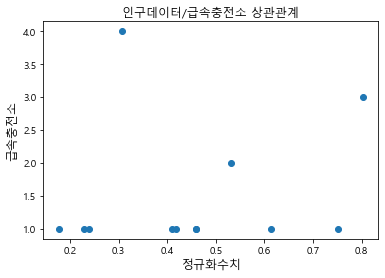

In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib.pylab as pylab
font_name = fm.FontProperties(fname = 'C:/Windows/Fonts/malgun.ttf').get_name()
mpl.rc('font', family = font_name)
mpl.rcParams['axes.unicode_minus'] = False


# xlsx 파일을 읽어 DataFrame 객체로 만들기. 인덱스 칼럼은 Point로 설정

df = pd.read_excel('C:/Users/PARK SE JUN/OneDrive - 한국항공대학교/4학년1학기/캡스톤/Untitled Folder/정규화_급속충전_데이터.xlsx')
x = df['정규화수치']
y = df['급속충전소']

plt.scatter(x, y)
plt.title("인구데이터/급속충전소 상관관계")
plt.xlabel('정규화수치', fontsize=12)
plt.ylabel('급속충전소', fontsize=12)


In [ ]:
# 2. 강남구 관광명소 위치데이터를 통한 급속 충전소 위치 선정 타당성 평가
# (1) 강남구 관광명소 좌표화

import pandas as pd
import folium as g

sightseeing_gangnam = pd.read_excel('C:/Users/PARK SE JUN/OneDrive - 한국항공대학교/4학년1학기/캡스톤/Untitled Folder/관광명소_위도경도.xlsx')
sightseeing_gangnam.head()

# 관광명소 지도 표시

g_map2 = g.Map(location=[37.500292, 127.063320],zoom_start=12.5)

for i in range(len(sightseeing_gangnam)):
    marker01 = g.Marker([sightseeing_gangnam.loc[i]['위도'], sightseeing_gangnam.loc[i]['경도']],
                       icon = g.Icon(color='blue'))
    marker01.add_to(g_map2)

g_map2

In [ ]:
# (2) 관광명소 1km 반경 내 급속 충전소 확인

import pandas as pd
import folium as g

sightseeing_gangnam = pd.read_excel('C:/Users/PARK SE JUN/OneDrive - 한국항공대학교/4학년1학기/캡스톤/Untitled Folder/관광명소_위도경도.xlsx')
sightseeing_gangnam.head()
fastcharge_gangnam = pd.read_excel('C:/Users/PARK SE JUN/OneDrive - 한국항공대학교/4학년1학기/캡스톤/jupyter/4. 강남구 급속충전소 위치/강남구_급속충전소_환경부.xlsx')
fastcharge_gangnam.head()

# 관광명소 지도 표시

g_map = g.Map(location=[37.500292, 127.063320],zoom_start=12.5)

for i in range(len(sightseeing_gangnam)):
    marker01 = g.Marker([sightseeing_gangnam.loc[i]['위도'], sightseeing_gangnam.loc[i]['경도']],
                       icon = g.Icon(color='blue'))
    marker01.add_to(g_map)

for j in range(len(sightseeing_gangnam)):
    marker02 = g.CircleMarker([sightseeing_gangnam.loc[j]['위도'], sightseeing_gangnam.loc[j]['경도']],
                       radius=70, color='blue', popup='campus seven', fill_color='skyblue')
    marker02.add_to(g_map)

# 급속충전소 위치 표시

for i in range(len(fastcharge_gangnam)):
    marker03 = g.Marker([fastcharge_gangnam.loc[i]['위도'], fastcharge_gangnam.loc[i]['경도']],
                       icon = g.Icon(color='red'))
    marker03.add_to(g_map)

g_map

In [ ]:
# 3. Haversine을 통한 강남구 관광명소 클러스터링
# (1) Haversine 공식을 통한 관광명소 간 직선거리 도출

from haversine import haversine

# 관광명소 위경도 입력
#Latitude, Longtitude 순서

one = (37.469161, 127.0222028)
two = (37.5109777, 127.0521271)
three = (37.5274948, 127.0335504)
four = (37.5209554, 127.0201845)
five = (37.501965, 127.0280582)
six = (37.4749982, 127.0608237)
seven = (37.5244813, 127.033178)
eight = (37.514852, 127.0551879)
nine = (37.5148507, 127.039867)
ten = (37.5285765, 127.0349609)
eleven = (37.5285752, 127.0205023)
twelve = (37.5223408, 127.0351775)
thirteen = (37.504715, 127.048926)
fourteen = (37.5273312, 127.0251576)
fifteen = (37.5279242, 127.0394695)
sixteen = (37.5086154, 127.0422713)
seventeen = (37.496941, 127.0511313)
eighteen = (37.4935762, 127.0903966)


In [ ]:
print(haversine(one, two, unit= 'km'))
print(haversine(one, three, unit= 'km'))
print(haversine(one, four, unit= 'km'))
print(haversine(one, five, unit= 'km'))
print(haversine(one, six, unit= 'km'))
print(haversine(one, seven, unit= 'km'))
print(haversine(one, eight, unit= 'km'))
print(haversine(one, nine, unit= 'km'))
print(haversine(one, ten, unit= 'km'))
print(haversine(one, eleven, unit= 'km'))
print(haversine(one, twelve, unit= 'km'))
print(haversine(one, thirteen, unit= 'km'))
print(haversine(one, fourteen, unit= 'km'))
print(haversine(one, fifteen, unit= 'km'))
print(haversine(one, sixteen, unit= 'km'))
print(haversine(one, seventeen, unit= 'km'))
print(haversine(one, eighteen, unit= 'km'))

5.347084144040636
6.56322652875662
5.762034354305459
3.6840500981989086
3.469546135912284
6.227080923146826
5.855054146696121
5.314126264631558
6.701893759865547
6.608269713836695
6.023099664994976
4.603159345477483
6.4734904101573445
6.709379226429798
4.730976867872899
4.00718117572836
6.601434548969253


In [ ]:
print(haversine(two, three, unit= 'km'))
print(haversine(two, four, unit= 'km'))
print(haversine(two, five, unit= 'km'))
print(haversine(two, six, unit= 'km'))
print(haversine(two, seven, unit= 'km'))
print(haversine(two, eight, unit= 'km'))
print(haversine(two, nine, unit= 'km'))
print(haversine(two, ten, unit= 'km'))
print(haversine(two, eleven, unit= 'km'))
print(haversine(two, twelve, unit= 'km'))
print(haversine(two, thirteen, unit= 'km'))
print(haversine(two, fourteen, unit= 'km'))
print(haversine(two, fifteen, unit= 'km'))
print(haversine(two, sixteen, unit= 'km'))
print(haversine(two, seventeen, unit= 'km'))
print(haversine(two, eighteen, unit= 'km'))

2.461176890143103
3.027866835068119
2.347743994791038
4.073651355607678
2.2466936142319445
0.5084033338690038
1.1639633103901372
2.474166504235235
3.4070517007638172
1.9573547848654351
0.7514487593535422
2.994030612593769
2.19021021202374
0.9081530366911954
1.5632818780979982
3.8911297284552786


In [ ]:
print(haversine(three, four, unit= 'km'))
print(haversine(three, five, unit= 'km'))
print(haversine(three, six, unit= 'km'))
print(haversine(three, seven, unit= 'km'))
print(haversine(three, eight, unit= 'km'))
print(haversine(three, nine, unit= 'km'))
print(haversine(three, ten, unit= 'km'))
print(haversine(three, eleven, unit= 'km'))
print(haversine(three, twelve, unit= 'km'))
print(haversine(three, thirteen, unit= 'km'))
print(haversine(three, fourteen, unit= 'km'))
print(haversine(three, fifteen, unit= 'km'))
print(haversine(three, sixteen, unit= 'km'))
print(haversine(three, seventeen, unit= 'km'))
print(haversine(three, eighteen, unit= 'km'))

1.3849617743925933
2.8798213500830148
6.313739290103826
0.3366918193471147
2.370180158929139
1.5123025802966388
0.17302723179703727
1.1568863106161094
0.5907895880867041
2.8731681574635206
0.740339173082705
0.5241506202992618
2.235761638666155
3.7345889848025084
6.274229159898388


In [ ]:
print(haversine(four, five, unit= 'km'))
print(haversine(four, six, unit= 'km'))
print(haversine(four, seven, unit= 'km'))
print(haversine(four, eight, unit= 'km'))
print(haversine(four, nine, unit= 'km'))
print(haversine(four, ten, unit= 'km'))
print(haversine(four, eleven, unit= 'km'))
print(haversine(four, twelve, unit= 'km'))
print(haversine(four, thirteen, unit= 'km'))
print(haversine(four, fourteen, unit= 'km'))
print(haversine(four, fifteen, unit= 'km'))
print(haversine(four, sixteen, unit= 'km'))
print(haversine(four, seventeen, unit= 'km'))
print(haversine(four, eighteen, unit= 'km'))

2.2229107794968574
6.242411265402067
1.2111138601305242
3.160871701381313
1.8639167386989126
1.5544122653634047
0.8477476618146685
1.33119731167167
3.112490228397551
0.8336453231549987
1.868922324970114
2.3827857314723397
3.8186002848576948
6.901122757185567


In [ ]:
print(haversine(five, six, unit= 'km'))
print(haversine(five, seven, unit= 'km'))
print(haversine(five, eight, unit= 'km'))
print(haversine(five, nine, unit= 'km'))
print(haversine(five, ten, unit= 'km'))
print(haversine(five, eleven, unit= 'km'))
print(haversine(five, twelve, unit= 'km'))
print(haversine(five, thirteen, unit= 'km'))
print(haversine(five, fourteen, unit= 'km'))
print(haversine(five, fifteen, unit= 'km'))
print(haversine(five, sixteen, unit= 'km'))
print(haversine(five, seventeen, unit= 'km'))
print(haversine(five, eighteen, unit= 'km'))

4.165197512964433
2.5440992716857522
2.789265608270377
1.7714295660489634
3.0210483835961504
3.0330423731373526
2.35109659749503
1.8660371424911246
2.8321750358947875
3.0569700690828094
1.455586549545155
2.110724379877901
5.578016975217564


In [ ]:
print(haversine(six, seven, unit= 'km'))
print(haversine(six, eight, unit= 'km'))
print(haversine(six, nine, unit= 'km'))
print(haversine(six, ten, unit= 'km'))
print(haversine(six, eleven, unit= 'km'))
print(haversine(six, twelve, unit= 'km'))
print(haversine(six, thirteen, unit= 'km'))
print(haversine(six, fourteen, unit= 'km'))
print(haversine(six, fifteen, unit= 'km'))
print(haversine(six, sixteen, unit= 'km'))
print(haversine(six, seventeen, unit= 'km'))
print(haversine(six, eighteen, unit= 'km'))

6.018549702227496
4.459351874954848
4.801626359139819
6.379551813118788
6.9385635314052445
5.729856113687737
3.4670915483328715
6.615286017433205
6.179247871735754
4.080724757428545
2.5854639208098322
3.328111383593065


In [ ]:
print(haversine(seven, eight, unit= 'km'))
print(haversine(seven, nine, unit= 'km'))
print(haversine(seven, ten, unit= 'km'))
print(haversine(seven, eleven, unit= 'km'))
print(haversine(seven, twelve, unit= 'km'))
print(haversine(seven, thirteen, unit= 'km'))
print(haversine(seven, fourteen, unit= 'km'))
print(haversine(seven, fifteen, unit= 'km'))
print(haversine(seven, sixteen, unit= 'km'))
print(haversine(seven, seventeen, unit= 'km'))
print(haversine(seven, eighteen, unit= 'km'))

2.216860778878976
1.222615647214406
0.48174510613522753
1.2069533194846036
0.2962162970374389
2.6000130580080656
0.7750364330618451
0.6740840973271505
1.9379499937234952
3.44755285224731
6.1059094718330575


In [ ]:
print(haversine(eight, nine, unit= 'km'))
print(haversine(eight, ten, unit= 'km'))
print(haversine(eight, eleven, unit= 'km'))
print(haversine(eight, twelve, unit= 'km'))
print(haversine(eight, thirteen, unit= 'km'))
print(haversine(eight, fourteen, unit= 'km'))
print(haversine(eight, fifteen, unit= 'km'))
print(haversine(eight, sixteen, unit= 'km'))
print(haversine(eight, seventeen, unit= 'km'))
print(haversine(eight, eighteen, unit= 'km'))

1.3512947981058128
2.3475685613376527
3.4184532392651747
1.9514096327285966
1.2552359674216413
2.989934478167464
2.008604025535152
1.3337475585977183
2.023505603119776
3.9042312080179977


In [ ]:
print(haversine(nine, ten, unit= 'km'))
print(haversine(nine, eleven, unit= 'km'))
print(haversine(nine, twelve, unit= 'km'))
print(haversine(nine, thirteen, unit= 'km'))
print(haversine(nine, fourteen, unit= 'km'))
print(haversine(nine, fifteen, unit= 'km'))
print(haversine(nine, sixteen, unit= 'km'))
print(haversine(nine, seventeen, unit= 'km'))
print(haversine(nine, eighteen, unit= 'km'))

1.5863861372292472
2.2903160974049586
0.929901434316826
1.3815588188152537
1.8996762306661663
1.4541315104049708
0.7250415847593162
2.225588417010882
5.046170400256658


In [ ]:
print(haversine(ten, eleven, unit= 'km'))
print(haversine(ten, twelve, unit= 'km'))
print(haversine(ten, thirteen, unit= 'km'))
print(haversine(ten, fourteen, unit= 'km'))
print(haversine(ten, fifteen, unit= 'km'))
print(haversine(ten, sixteen, unit= 'km'))
print(haversine(ten, seventeen, unit= 'km'))
print(haversine(ten, eighteen, unit= 'km'))

1.2750058657870131
0.693642214001418
2.925226241252671
0.875513395122145
0.4041465998653114
2.3113218856682507
3.7958550374599556
6.24941666031047


In [ ]:
print(haversine(eleven, twelve, unit= 'km'))
print(haversine(eleven, thirteen, unit= 'km'))
print(haversine(eleven, fourteen, unit= 'km'))
print(haversine(eleven, fifteen, unit= 'km'))
print(haversine(eleven, sixteen, unit= 'km'))
print(haversine(eleven, seventeen, unit= 'km'))
print(haversine(eleven, eighteen, unit= 'km'))

1.4681367244496062
3.6501579613584973
0.43320111209852097
1.6741617217059892
2.934613887632185
4.435265360076073
7.290546005289919


In [ ]:
print(haversine(twelve, thirteen, unit= 'km'))
print(haversine(twelve, fourteen, unit= 'km'))
print(haversine(twelve, fifteen, unit= 'km'))
print(haversine(twelve, sixteen, unit= 'km'))
print(haversine(twelve, seventeen, unit= 'km'))
print(haversine(twelve, eighteen, unit= 'km'))

2.30471081122498
1.0434208663249096
0.727126289619376
1.649464303907619
3.1554885804486172
5.827042724200677


In [ ]:
print(haversine(thirteen, fourteen, unit= 'km'))
print(haversine(thirteen, fifteen, unit= 'km'))
print(haversine(thirteen, sixteen, unit= 'km'))
print(haversine(thirteen, seventeen, unit= 'km'))
print(haversine(thirteen, eighteen, unit= 'km'))

3.2739663124413125
2.712174405337182
0.7298461255724746
0.8860513925733482
3.8624292891525616


In [ ]:
print(haversine(fourteen, fifteen, unit= 'km'))
print(haversine(fourteen, sixteen, unit= 'km'))
print(haversine(fourteen, seventeen, unit= 'km'))
print(haversine(fourteen, eighteen, unit= 'km'))

1.263806758112035
2.5708270657211885
4.082611348276087
6.870287289084739


In [ ]:
print(haversine(fifteen, sixteen, unit= 'km'))
print(haversine(fifteen, seventeen, unit= 'km'))
print(haversine(fifteen, eighteen, unit= 'km'))

2.1612166434949223
3.595451853389143
5.89620467632537


In [ ]:
print(haversine(sixteen, seventeen, unit= 'km'))
print(haversine(sixteen, eighteen, unit= 'km'))

1.5152602743160315
4.5628954471370236


In [ ]:
print(haversine(seventeen, eighteen, unit= 'km'))

3.484233399597695


In [ ]:
# (2) 관광명소 간 최소거리를 통한 군집화(Clustering)

import pandas as pd
import folium as g

sightseeing_gangnam = pd.read_excel('C:/Users/PARK SE JUN/OneDrive - 한국항공대학교/4학년1학기/캡스톤/Untitled Folder/관광명소_위도경도.xlsx')
sightseeing_gangnam.head()
fastcharge_gangnam = pd.read_excel('C:/Users/PARK SE JUN/OneDrive - 한국항공대학교/4학년1학기/캡스톤/jupyter/4. 강남구 급속충전소 위치/강남구_급속충전소_환경부.xlsx')
fastcharge_gangnam.head()

# 관광명소 지도 표시

g_map = g.Map(location=[37.500292, 127.063320],zoom_start=12.5)

for i in range(len(sightseeing_gangnam)):
    marker01 = g.Marker([sightseeing_gangnam.loc[i]['위도'], sightseeing_gangnam.loc[i]['경도']],
                       icon = g.Icon(color='blue'))
    marker01.add_to(g_map)

# 급속충전소 위치 표시

for i in range(len(fastcharge_gangnam)):
    marker03 = g.Marker([fastcharge_gangnam.loc[i]['위도'], fastcharge_gangnam.loc[i]['경도']],
                       icon = g.Icon(color='red'))
    marker03.add_to(g_map)

g_map

In [ ]:
# 4. 관광명소 클러스터링을 통한 공용주차장 위치 타당성 평가
# (1) 인구분포로 정규화된 지도 내 위치 평가

import folium
import pandas as pd

geo_json = 'https://raw.githubusercontent.com/southkorea/seoul-maps/master/kostat/2013/json/seoul_submunicipalities_geo_simple.json'
parkinglot_gangnam = pd.read_excel('C:/Users/PARK SE JUN/OneDrive - 한국항공대학교/4학년1학기/캡스톤/jupyter/5. 공영주차장/강남구_주차장.xlsx')
parkinglot_gangnam.head()

raw_data = [
    ['신사동', 0.2586133],
    ['논현1동', 0.418548],
    ['논현2동', 0.39067516],
    ['압구정동', 0.53164455],
    ['청담동', 0.52690991],
    ['삼성1동', 0.17670661],
    ['삼성2동', 0.6144875],
    ['대치1동', 0.4825326],
    ['대치2동', 0.80307083],
    ['대치4동', 0.35838862],
    ['역삼1동', 0.75123047],
    ['역삼2동', 0.78624545],
    ['도곡1동', 0.41076396],
    ['도곡2동', 0.71934517],
    ['개포1동', 0],
    ['개포2동', 0.40996148],
    ['개포4동', 0.45784293],
    ['세곡동', 1],
    ['일원본동', 0.45968864],
    ['일원1동', 0.23913974],
    ['일원2동', 0.30638776],
    ['수서동', 0.22967045],
]
data = pd.DataFrame(raw_data, columns=['name', 'value'])
data

m = folium.Map(
    location=[37.494292, 127.063320],
    zoom_start=13,
    tiles='Stamen Terrain',
)

folium.Choropleth(
    geo_data=geo_json,
    name='choropleth',
    data=data,
    columns=['name', 'value'],
    key_on='feature.properties.name',
    fill_color='Blues',
    fill_opacity=0.7,
    line_opacity=0.2,
).add_to(m)

for i in range(len(parkinglot_gangnam)):
    marker06 = folium.Marker([parkinglot_gangnam.loc[i]['위도'], parkinglot_gangnam.loc[i]['경도']],
                       icon = folium.Icon(color='orange'))
    marker06.add_to(m)

m

In [ ]:
# (2) 하버사인 클러스터링 내 위치 평가

import pandas as pd
import folium as g

sightseeing_gangnam = pd.read_excel('C:/Users/PARK SE JUN/OneDrive - 한국항공대학교/4학년1학기/캡스톤/Untitled Folder/관광명소_위도경도.xlsx')
sightseeing_gangnam.head()
parkinglot_gangnam = pd.read_excel('C:/Users/PARK SE JUN/OneDrive - 한국항공대학교/4학년1학기/캡스톤/jupyter/5. 공영주차장/강남구_주차장.xlsx')
parkinglot_gangnam.head()

# 관광명소 지도 표시

g_map = g.Map(location=[37.500292, 127.063320],zoom_start=12.5)

for i in range(len(sightseeing_gangnam)):
    marker01 = g.Marker([sightseeing_gangnam.loc[i]['위도'], sightseeing_gangnam.loc[i]['경도']],
                       icon = g.Icon(color='blue'))
    marker01.add_to(g_map)

# 급속충전소 위치 표시

for i in range(len(parkinglot_gangnam)):
    marker07 = g.Marker([parkinglot_gangnam.loc[i]['위도'], parkinglot_gangnam.loc[i]['경도']],
                       icon = g.Icon(color='orange'))
    marker07.add_to(g_map)

g_map

In [ ]:
# 5. 관광명소 클러스터링을 통한 아이파크 위치 타당성 평가
# (1) 인구분포로 정규화된 지도 내 위치 평가

import folium
import pandas as pd

geo_json = 'https://raw.githubusercontent.com/southkorea/seoul-maps/master/kostat/2013/json/seoul_submunicipalities_geo_simple.json'
ipark_gangnam = pd.read_excel('C:/Users/PARK SE JUN/OneDrive - 한국항공대학교/4학년1학기/캡스톤/jupyter/6. 아이파크/아이파크.xlsx')
ipark_gangnam.head()

raw_data = [
    ['신사동', 0.2586133],
    ['논현1동', 0.418548],
    ['논현2동', 0.39067516],
    ['압구정동', 0.53164455],
    ['청담동', 0.52690991],
    ['삼성1동', 0.17670661],
    ['삼성2동', 0.6144875],
    ['대치1동', 0.4825326],
    ['대치2동', 0.80307083],
    ['대치4동', 0.35838862],
    ['역삼1동', 0.75123047],
    ['역삼2동', 0.78624545],
    ['도곡1동', 0.41076396],
    ['도곡2동', 0.71934517],
    ['개포1동', 0],
    ['개포2동', 0.40996148],
    ['개포4동', 0.45784293],
    ['세곡동', 1],
    ['일원본동', 0.45968864],
    ['일원1동', 0.23913974],
    ['일원2동', 0.30638776],
    ['수서동', 0.22967045],
]
data = pd.DataFrame(raw_data, columns=['name', 'value'])
data

m = folium.Map(
    location=[37.494292, 127.063320],
    zoom_start=13,
    tiles='Stamen Terrain',
)

folium.Choropleth(
    geo_data=geo_json,
    name='choropleth',
    data=data,
    columns=['name', 'value'],
    key_on='feature.properties.name',
    fill_color='Blues',
    fill_opacity=0.7,
    line_opacity=0.2,
).add_to(m)

for i in range(len(ipark_gangnam)):
    marker05 = folium.Marker([ipark_gangnam.loc[i]['위도'], ipark_gangnam.loc[i]['경도']],
                       icon = folium.Icon(color='green'))
    marker05.add_to(m)

m

In [ ]:
# (2) 하버사인 클러스터링 내 위치 평가

import pandas as pd
import folium as g

sightseeing_gangnam = pd.read_excel('C:/Users/PARK SE JUN/OneDrive - 한국항공대학교/4학년1학기/캡스톤/Untitled Folder/관광명소_위도경도.xlsx')
sightseeing_gangnam.head()
ipark_gangnam = pd.read_excel('C:/Users/PARK SE JUN/OneDrive - 한국항공대학교/4학년1학기/캡스톤/jupyter/6. 아이파크/아이파크.xlsx')
ipark_gangnam.head()

# 관광명소 지도 표시

g_map = g.Map(location=[37.500292, 127.063320],zoom_start=12.5)

for i in range(len(sightseeing_gangnam)):
    marker01 = g.Marker([sightseeing_gangnam.loc[i]['위도'], sightseeing_gangnam.loc[i]['경도']],
                       icon = g.Icon(color='blue'))
    marker01.add_to(g_map)

# 급속충전소 위치 표시

for i in range(len(ipark_gangnam)):
    marker04 = g.Marker([ipark_gangnam.loc[i]['위도'], ipark_gangnam.loc[i]['경도']],
                       icon = g.Icon(color='green'))
    marker04.add_to(g_map)

g_map

In [ ]:
# 최적화 데이터 지도 반영

import pandas as pd
import folium as g

optimal_location = pd.read_excel('C:/Users/PARK SE JUN/OneDrive - 한국항공대학교/4학년1학기/캡스톤/jupyter/7. 최적화/전기충전차_주차장_좌표.xlsx')
optimal_location.head()

g_map = g.Map(location=[37.500292, 127.063320],zoom_start=12.5)

for i in range(len(optimal_location)):
    marker07 = g.Marker([optimal_location.loc[i]['위도'], optimal_location.loc[i]['경도']],
                       icon = g.Icon(color='red'))
    marker07.add_to(g_map)

g_map

In [ ]:
# 최적화 데이터 지도 반영

import pandas as pd
import folium as g

optimal_location = pd.read_excel('C:/Users/PARK SE JUN/OneDrive - 한국항공대학교/4학년1학기/캡스톤/jupyter/7. 최적화/전기충전차_주차장_좌표.xlsx')
optimal_location.head()
parking_lots = pd.read_excel('C:/Users/PARK SE JUN/OneDrive - 한국항공대학교/4학년1학기/캡스톤/jupyter/7. 최적화/아이파크_공영주차장_좌표.xlsx')
parking_lots.head()

g_map = g.Map(location=[37.500292, 127.063320],zoom_start=12.5)

for i in range(len(parking_lots)):
    marker08 = g.Marker([parking_lots.loc[i]['위도'], parking_lots.loc[i]['경도']],
                       icon = g.Icon(color='blue'))
    marker08.add_to(g_map)
    
for j in range(len(optimal_location)):
    marker02 = g.CircleMarker([optimal_location.loc[j]['위도'], optimal_location.loc[j]['경도']],
                       radius=131, color='red', popup='campus seven', fill_color='skyblue')
    marker02.add_to(g_map)

g_map